In [1]:
#Test flow cytometry data output counts-poisson model fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson, poisson, chisquare, skew, skewtest
import statsmodels.api as sm

# Specify the path to your CSV file
df = pd.read_csv('844-220v1_081723 CD4+CD127 counts.csv')

df = pd.DataFrame(df)
#print(df)

In [2]:
# Create a new DataFrame with repeated values based on counts
result_array = np.repeat(df['value'], df['count'])
result_df = pd.DataFrame({'value': np.repeat(df['value'], df['count'])})

# Convert the result to a NumPy array if needed
result_array = result_df['value'].to_numpy()

print(result_array)

#estimate appropriate bin sizes based on data
#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )

[-108.4815635   -73.94877614  -42.05004876  -38.22551138  -28.029145
  -20.38368954   11.46533868   21.65784512   24.20625481   26.7548089
   40.77514177   43.32501962   47.15033563   48.42558217   52.25177381
   58.63038904   66.28773197   77.7808277    79.05841889   86.72664214
   94.39978786   95.67915683   95.67915683  100.7981737   108.4815635
  109.7627244   112.325577    125.1510407   125.1510407   127.7185004
  134.1408281   141.8548887   141.8548887   144.4280848   145.7150389
  147.0022335   149.5773536   149.5773536   150.865284    152.1534643
  153.441897    162.468194    162.468194    162.468194    165.0495444
  165.0495444   166.3406332   167.6320009   167.6320009   172.80031
  181.8561581   184.4462833   184.4462833   187.0376629   189.6303172
  192.2242664   194.8195307   196.1176624   198.7149377   198.7149377
  198.7149377   202.6134191   203.913608    205.2141489   206.5150443
  207.8162968   207.8162968   207.8162968   207.8162968   209.117909
  210.4198835   211.72

In [3]:
#read in second dataset
# Specify the path to your CSV file
df2 = pd.read_csv('844-205v5 CD4+CD127 counts.csv')

df2 = pd.DataFrame(df2)
#print(df2)

# Create a new DataFrame with repeated values based on counts
result_array2 = np.repeat(df2['value'], df2['count'])
result_df2 = pd.DataFrame({'value': np.repeat(df2['value'], df2['count'])})

# Convert the result to a NumPy array if needed
result_array2 = result_df2['value'].to_numpy()

print(result_array2)

#estimate appropriate bin sizes based on data
#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array2, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )

[2.54780736e+00 3.69507840e+01 4.33250196e+01 4.71503356e+01
 5.86303890e+01 6.11824532e+01 6.50112633e+01 6.62877320e+01
 6.62877320e+01 7.01177632e+01 7.26716592e+01 7.52260084e+01
 7.77808277e+01 8.67266421e+01 9.18414969e+01 9.82383527e+01
 9.82383527e+01 1.00798174e+02 1.00798174e+02 1.02078324e+02
 1.02078324e+02 1.07200577e+02 1.12325577e+02 1.18735910e+02
 1.20018543e+02 1.20018543e+02 1.21301370e+02 1.25151041e+02
 1.26434668e+02 1.29002541e+02 1.29002541e+02 1.30286792e+02
 1.35425943e+02 1.37996839e+02 1.37996839e+02 1.39282626e+02
 1.41854889e+02 1.43141369e+02 1.45715039e+02 1.47002233e+02
 1.49577354e+02 1.50865284e+02 1.57308733e+02 1.58598199e+02
 1.61177927e+02 1.61177927e+02 1.65049544e+02 1.68923650e+02
 1.68923650e+02 1.70215583e+02 1.71507802e+02 1.72800310e+02
 1.72800310e+02 1.72800310e+02 1.72800310e+02 1.74093109e+02
 1.74093109e+02 1.77973279e+02 1.77973279e+02 1.79267267e+02
 1.81856158e+02 1.81856158e+02 1.83151065e+02 1.83151065e+02
 1.84446283e+02 1.844462

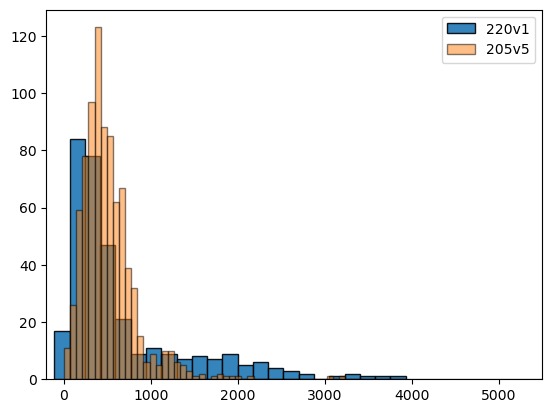

In [4]:
#plot data, exclude x-values >5500
#alpha value in plt.hist line indicates how bold the plotted bars are
#alpha = 1, indicates no transparency
plt.hist(result_array, bins=23, edgecolor='black', label='220v1', alpha=0.9)
plt.hist(result_array2, bins=3722, edgecolor='black', label='205v5', alpha=0.5)
plt.xlim(-200, 5500)
plt.legend()
plt.show()

In [5]:
#test the distribution of dataset1
#does it follow a normal distribution?
#Shapiro-Wilk Test

# Assuming 'data' is your DataFrame or array of values
stat, p_value = shapiro(result_array)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")

#Statistical Skewness Test

# Calculate skewness
skewness = skew(result_array)

# Perform skewness test
stat, p_value = skewtest(result_array)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Statistic: 0.7595208287239075, p-value: 1.0008990425055338e-21
Data does not look normally distributed (reject H0)
Skewness: 1.8679884105266957, p-value: 6.303886576140849e-23
Data is significantly skewed (reject H0)


In [7]:
#test the distribution of dataset2
#does it follow a normal distribution?
#Shapiro-Wilk Test

# Assuming 'data' is your DataFrame or array of values
stat, p_value = shapiro(result_array2)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")

#Statistical Skewness Test

# Calculate skewness
skewness = skew(result_array2)

# Perform skewness test
stat, p_value = skewtest(result_array2)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Statistic: 0.024890899658203125, p-value: 0.0
Data does not look normally distributed (reject H0)
Skewness: 28.802354490846007, p-value: 0.0
Data is significantly skewed (reject H0)


In [9]:
#Try log transforming the data to see if we get a normal distribution
#create a constant to add to each value, so there are no negatives
constant = 200
# Apply log transformation
log_result_array = np.log(result_array + constant)
log_result_array2 = np.log(result_array2 + constant)
#estimate appropriate bin sizes based on data
#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(log_result_array, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )
bin_size2 = np.histogram_bin_edges(log_result_array2, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size2) -1 )



Estimated Bin Number using Auto Rule: 15

Estimated Bin Number using Auto Rule: 68


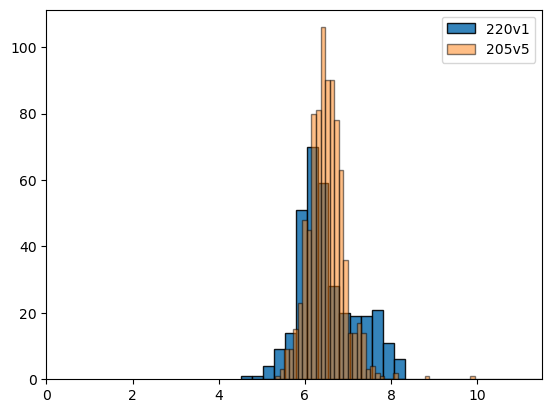

In [10]:
# Plot the log-transformed values
plt.hist(log_result_array, bins=15, edgecolor='black', label='220v1', alpha=0.9)
plt.hist(log_result_array2, bins=68, edgecolor='black', label='205v5', alpha=0.5)

plt.xlim(np.log(1), np.log(100000))  # Adjust the xlim to match the log-transformed scale
plt.legend()
plt.show()

In [11]:
#test the distribution of log-transformed dataset1
#does it follow a normal distribution?
#Shapiro-Wilk Test

# Assuming 'data' is your DataFrame or array of values
stat, p_value = shapiro(log_result_array)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")

#Statistical Skewness Test

# Calculate skewness
skewness = skew(log_result_array)

# Perform skewness test
stat, p_value = skewtest(log_result_array)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Statistic: 0.9554018378257751, p-value: 1.6009693126761704e-08
Data does not look normally distributed (reject H0)
Skewness: 0.5192484356440074, p-value: 0.00018651966674527643
Data is significantly skewed (reject H0)


In [12]:
#test the distribution of dataset2
#does it follow a normal distribution?
#Shapiro-Wilk Test

# Assuming 'data' is your DataFrame or array of values
stat, p_value = shapiro(log_result_array2)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")

#Statistical Skewness Test

# Calculate skewness
skewness = skew(log_result_array2)

# Perform skewness test
stat, p_value = skewtest(log_result_array2)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Statistic: 0.838682234287262, p-value: 1.7138921593768711e-28
Data does not look normally distributed (reject H0)
Skewness: 3.2730061296197044, p-value: 2.8115220082839357e-95
Data is significantly skewed (reject H0)


In [13]:
#Since the data are skewed, need to use a distribution-free method
#Mann-Whitney Test (similar to a Wilcoxon rank sum test) Two (unpaired) samples
from scipy.stats import mannwhitneyu

# Assuming result_array and result_array2 are your data arrays

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(result_array, result_array2)

# Output the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")


Mann-Whitney U statistic: 131596.0
P-value: 0.056349214352283246
Fail to reject the null hypothesis. There is no significant difference between the two groups.
